# Drawbacks of Neural Networks | Lecture 1

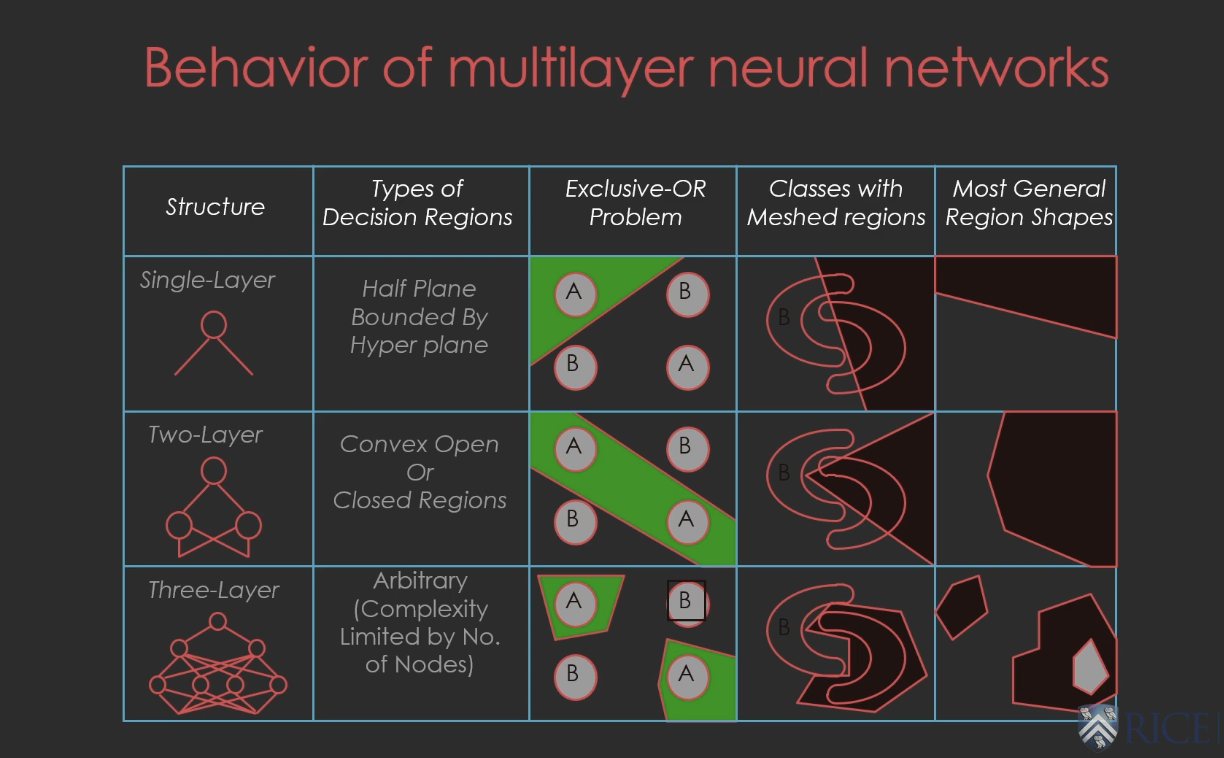

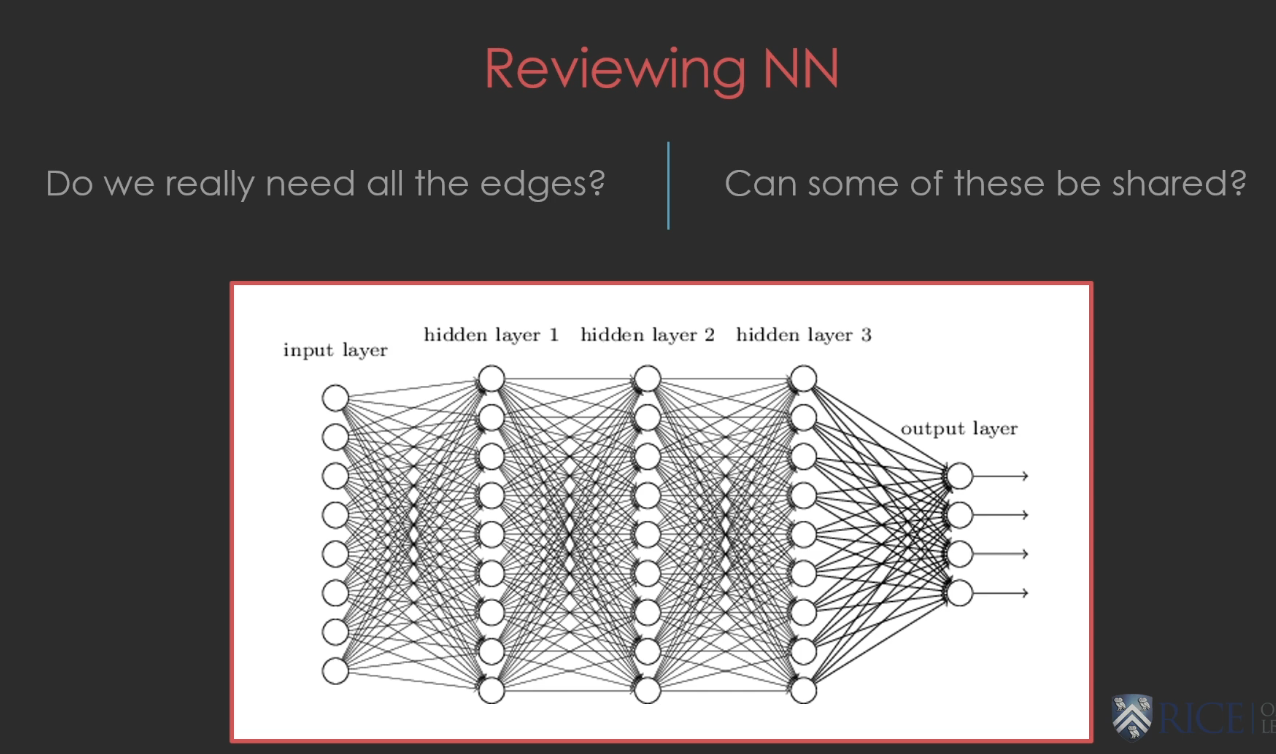

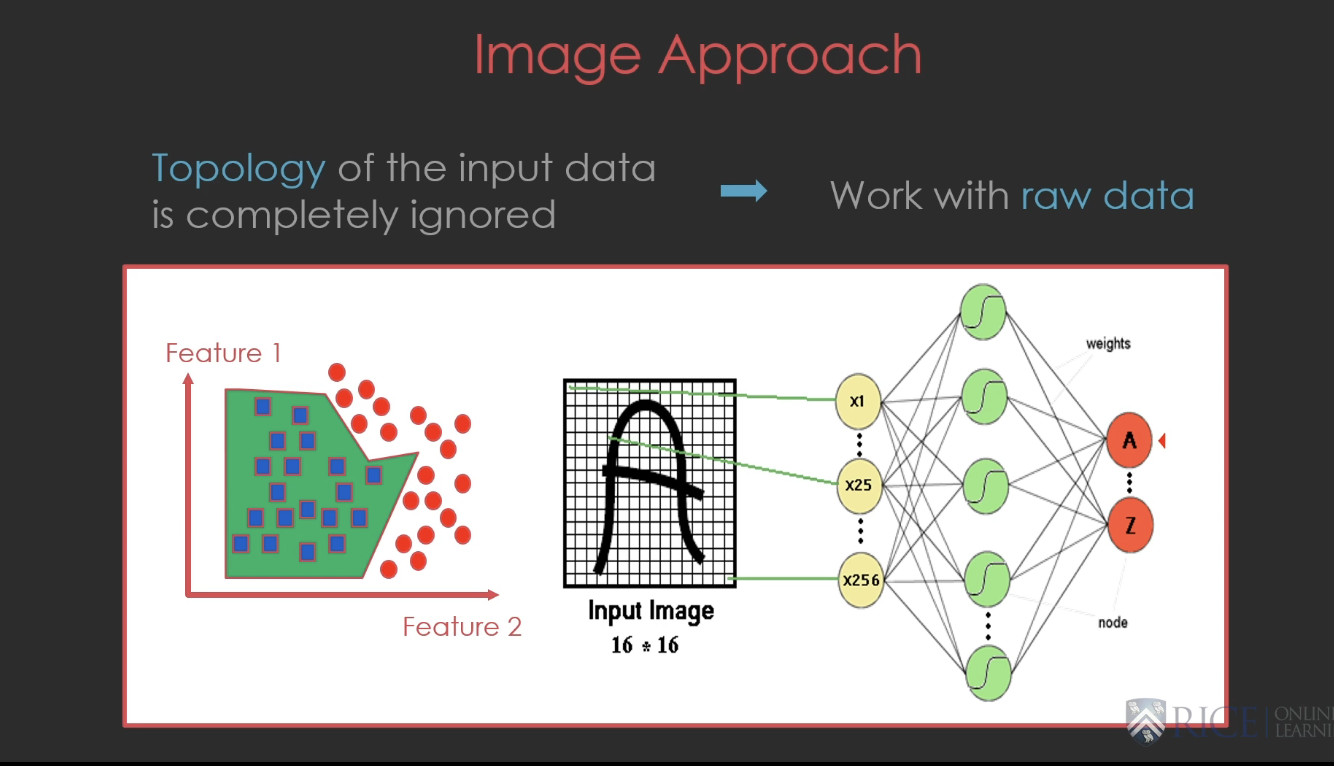

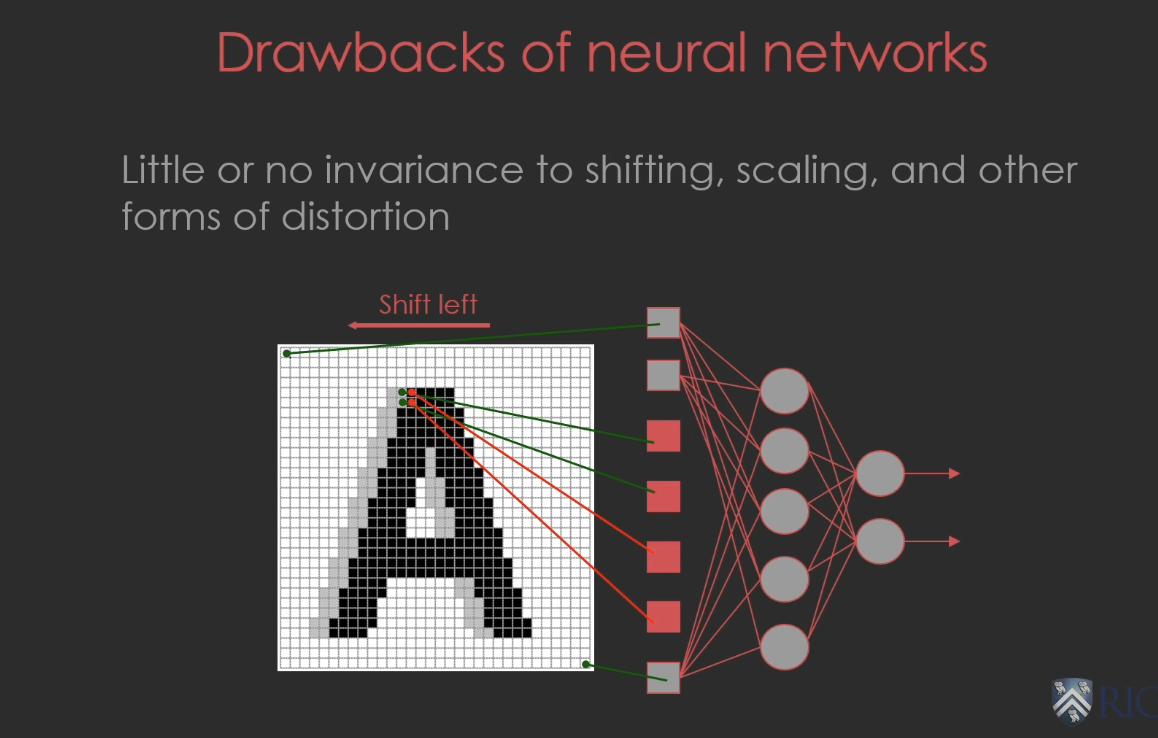

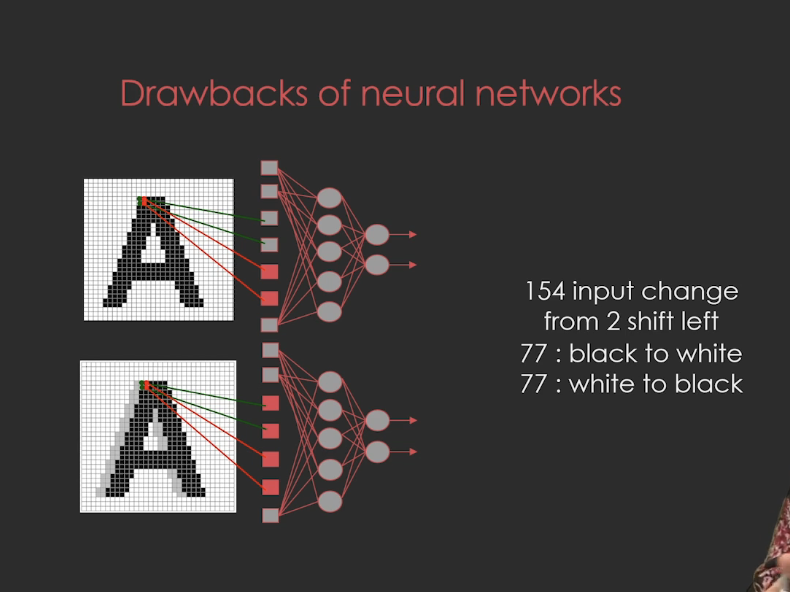

## Drawbacks of neural networks

Scaling, and other forms of distortion

Bascially, when the image shifts from it's original state, it causes this distortion and reduction in input change to the neural network.

To fix, we want to take advantage of the topology

## Consider learning an image

some patterns are much smaller than the whole image

represents a small region with fewer parameters = a beak detector (for an image of a bird)

How can we insure that the pattern appears in different places and the neural net can still capture them?
    **They can be compressed!**

## what about image size?

Our CNN should not consider size.

# Convolutional Neural Network | Lecture 2

## Convolutional Neural Network

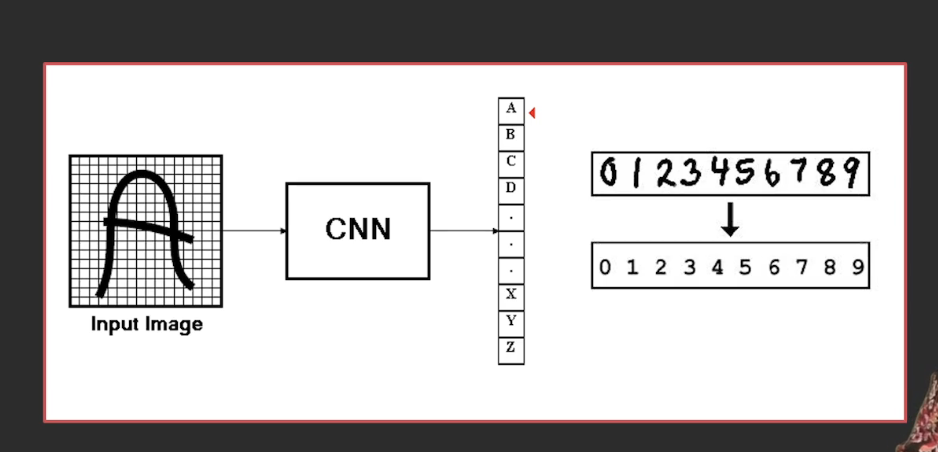

## A convolutional layer

 A convolutional layer has a number of filters that do some convolutional operation

 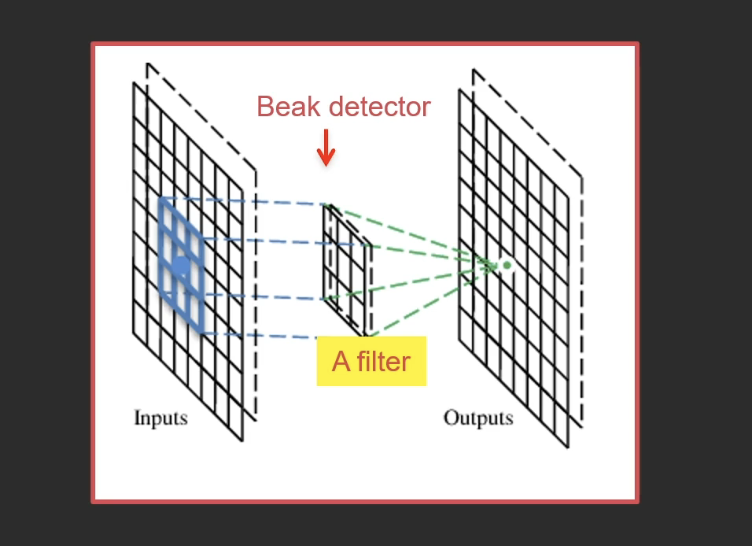

## Convolutional layers

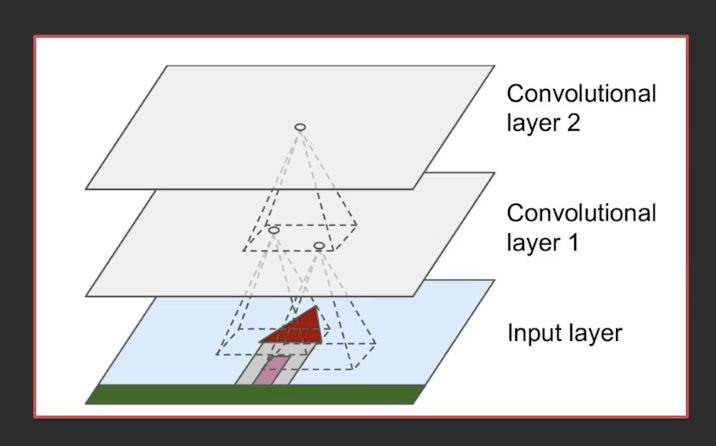

## Convolution

We take our 3x3 matrix and we scan through our image (pixels/squares) to detect our convolved feature

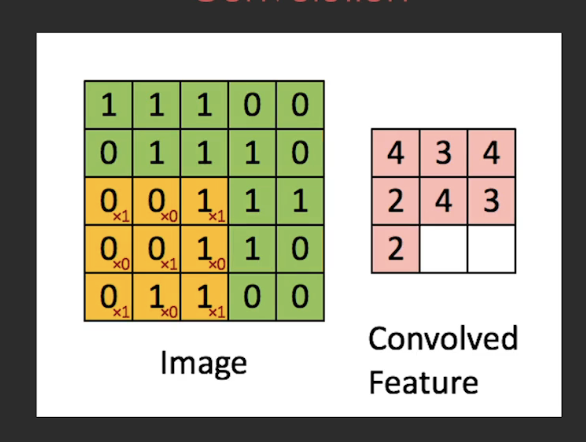

## Convolutional layer with padding

to be sure we capture what we are looking for if it is present on the edges of the image

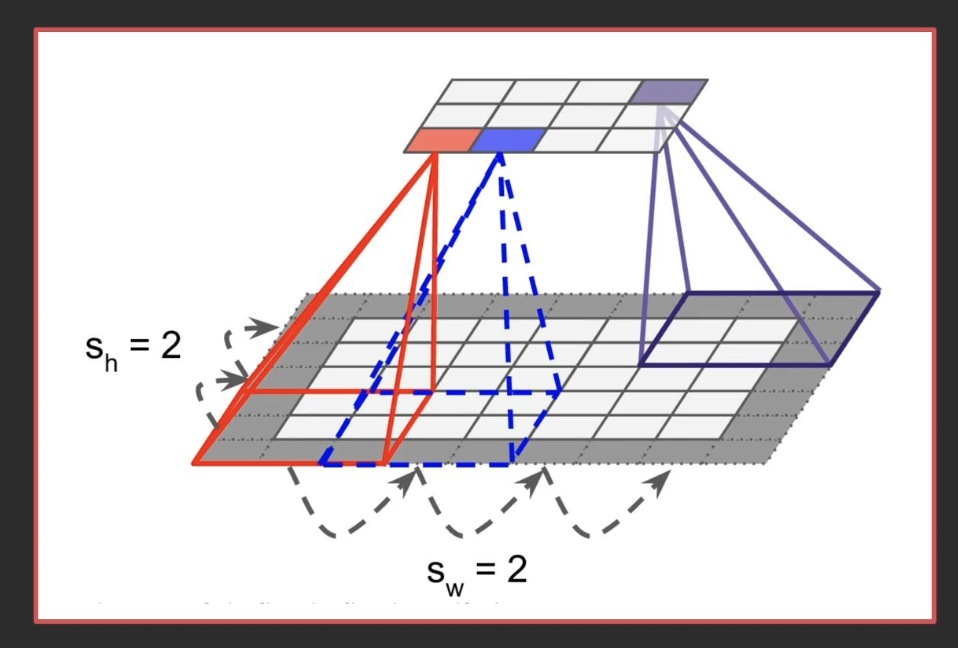

## Why pooling?

conduct subsampling and make it independent of image size. Essentially subsampling pixels will not change the object

We can subsample the pixes to make the image smaller

Fewer parameters to characterize the image

## Pooling

take a small matrix and look at the image and move that around across the image

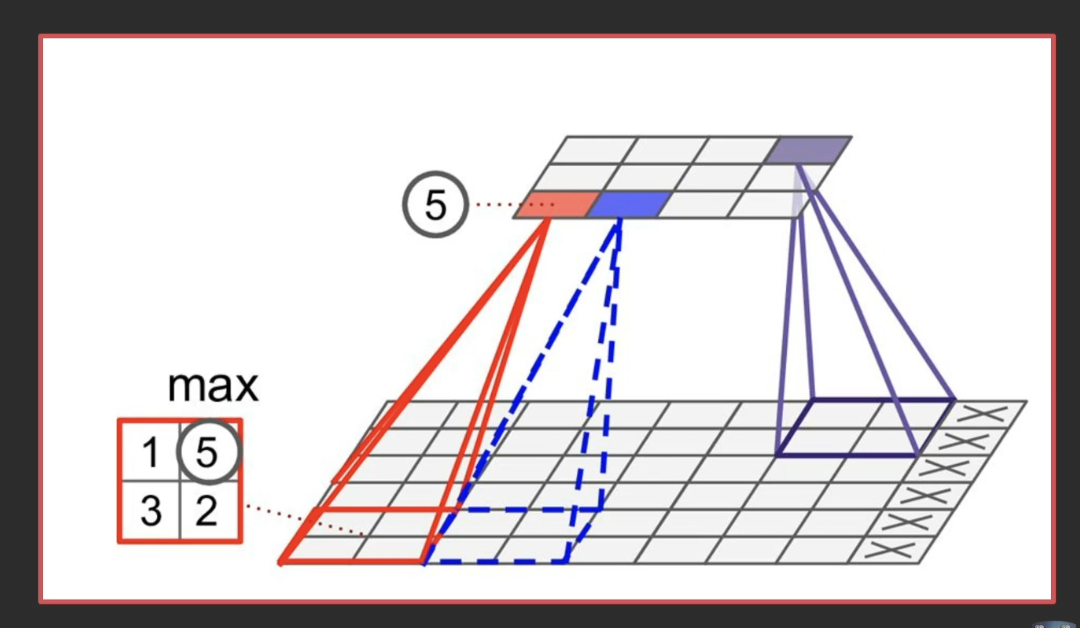

Looking at various places to place the image.

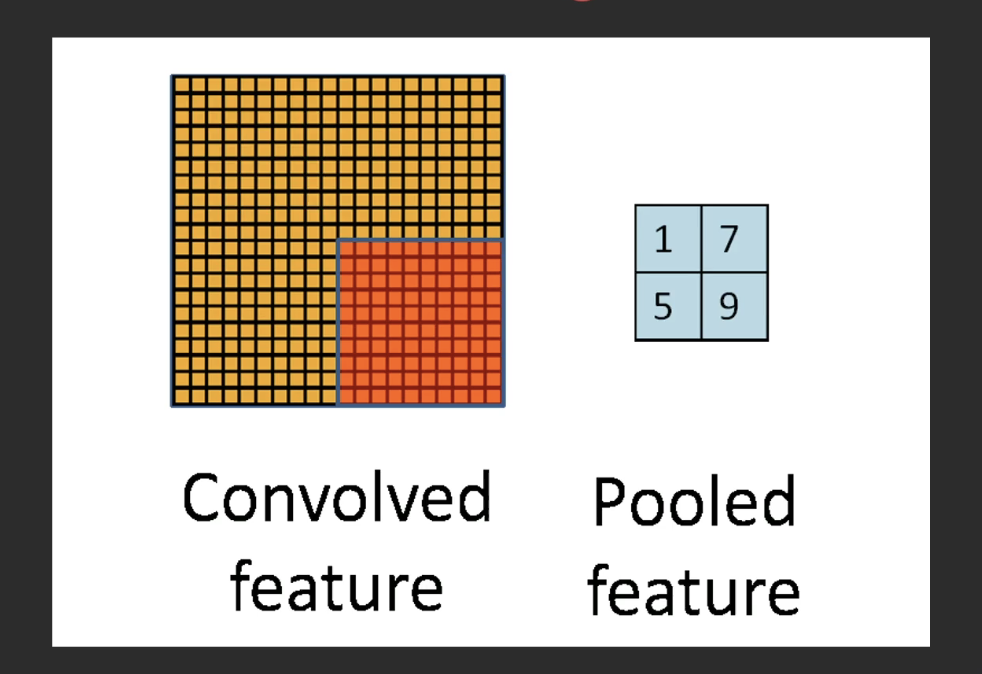

## CNN Architecture

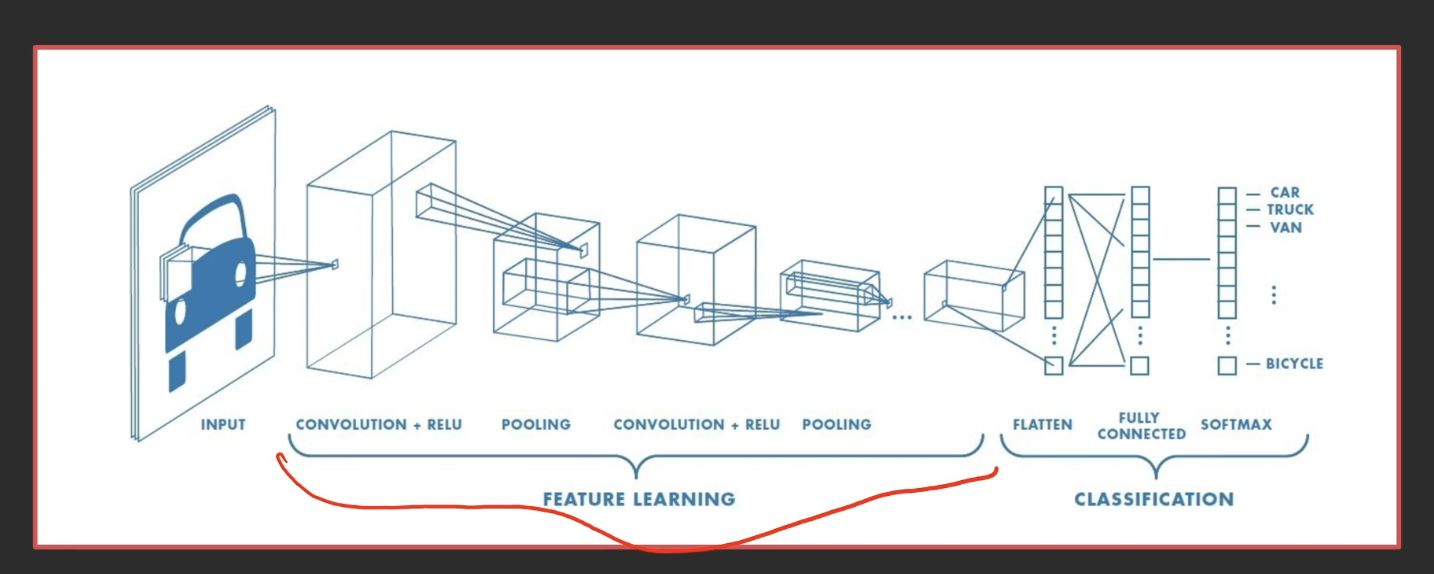


## About Convolutional NN's

* in 1995, Yann LeCun and Yoshua Bengio introduced the concept of convolutional neural networks

* CNN's were neurobiologically motivated by the findings of locally sensitive and orientation-selective nerve cells in the visual cortex

* they designed a nework structure that implicitly tracts relevant features

* convolutional neural networks are a special kind of multi-layer neural networks

## About CNN's

* CNN is a feed-forward network that can extract topological properties from an image

* like almost every other neural networks they are trained with a version of the back-propagation algorithm

* convolutional neural networks are designed to recognize visual patterns directly from pixel images with minimal preprocessing

* they can recognize patterns with extreme variability (such as handwritten characters)

## A CNN compresses a fully connected network in two ways

* reducing number of connections
    * shared weights on the edges

* max pooling further reduces the complexity

## The whole CNN

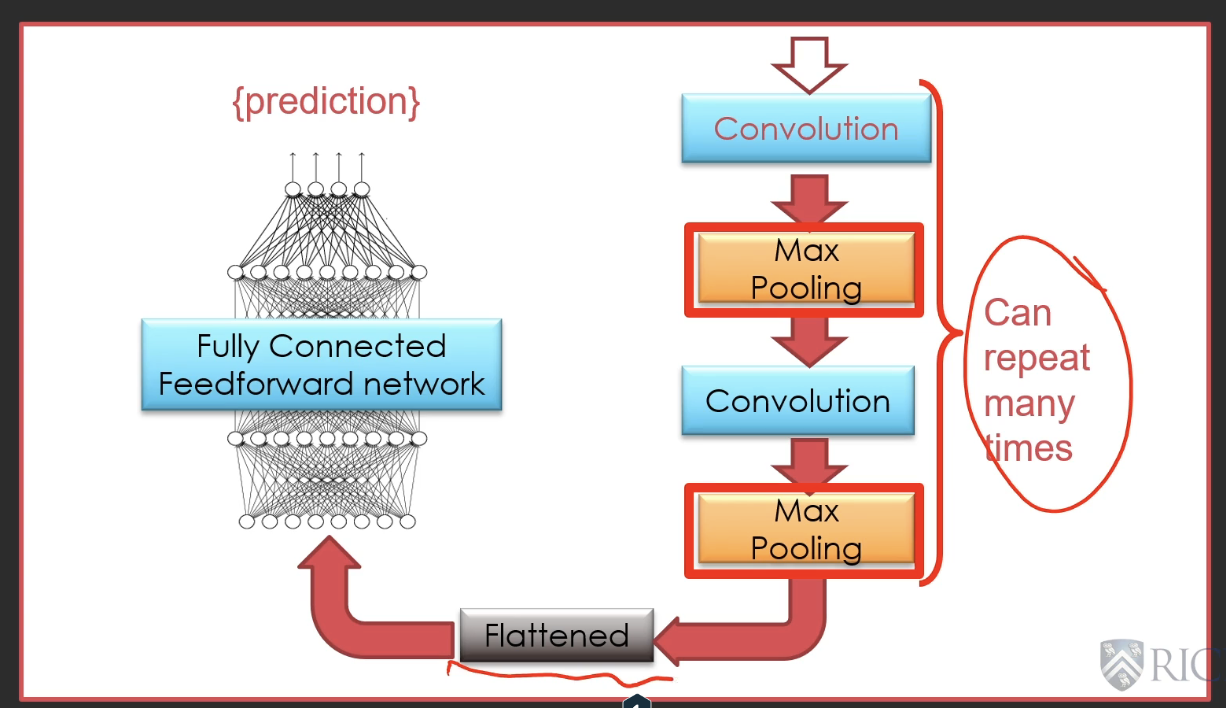

## Convolutional vs. fully connected

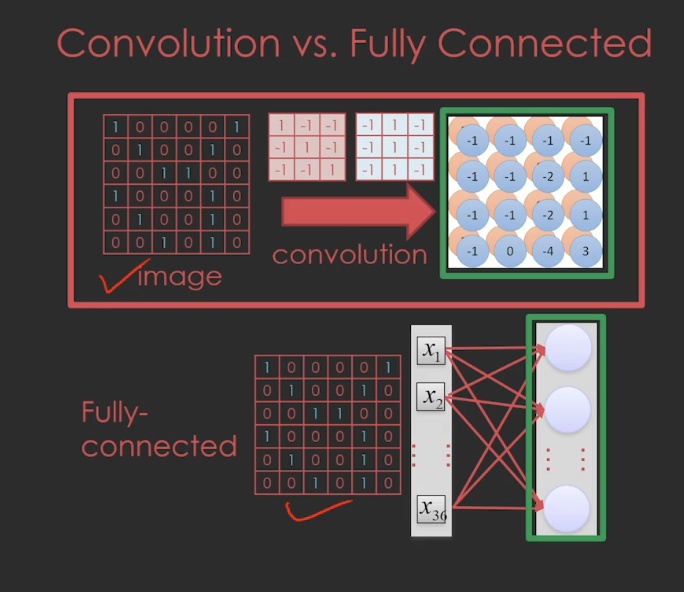

# CNN & TensorFlow | Lecture 3

## Building CNN in Tensor Flow with Keras

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
# we will not flatten our data until after pooling in our convolution
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('training matrix shape', X_train.shape)
print('testing matrix shape', X_test.shape)

training matrix shape (60000, 28, 28, 1)
testing matrix shape (10000, 28, 28, 1)


In [20]:
nb_classes = 10

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [21]:
# build model - set hyperparameters
model = Sequential()

# convolutional layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
convLayer01 = Activation('relu')
model.add(convLayer01)

# convolutional layer 2
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer02 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

# convolutional layer 3
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
convLayer03 = Activation('relu')
model.add(convLayer03)

# convolutional layer 4
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

# fully connected layer 5
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

# fully connected layer 6
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

## Some Well Known CNNs

Mostly for image data

AlexNet

LeNet

ResNet

GoogLeNet

## Work on your own CNN

In [1]:
# import the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, Convolution2D
from tensorflow.keras.layers import BatchNormalization

fam = cv2.imread('fam_photo.png')

fam = cv2.cvtColor(fam, cv2.COLOR_BGR2RGB)

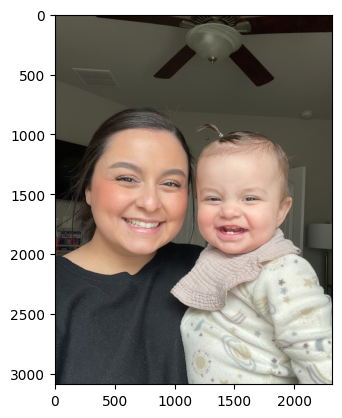

In [2]:
plt.imshow(fam)


In [3]:
fam.shape

(3088, 2316, 3)

In [4]:
# apply one layer of convolution
model = Sequential()

model.add(Convolution2D(
    3, # number of filter layers
    3, # y dimention of kernel (we're going for a 3x3 kernel)
    3, # x dimension of kernel
    input_shape=fam.shape
))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
# keras expects batches of images, so we have to add a dimension to trick it into being nice
fam_batch = np.expand_dims(fam, axis=0)

In [6]:
conv_fam = model.predict(fam_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [7]:
# here we get rid of the added dimension and plot the image
def  visualize_fam(fam_batch):
    fam = np.squeeze(fam_batch, axis=0)
    print(fam.shape)
    plt.imshow(fam)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1029, 772, 3)


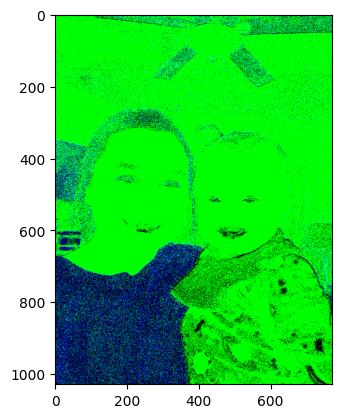

In [8]:
visualize_fam(conv_fam)

In [10]:
def nice_fam_printer(model, fam):
    '''prints the fam as a 2d array'''
    fam_batch = np.expand_dims(fam, axis=0)
    conv_fam2 = model.predict(fam_batch)

    conv_fam2 = np.squeeze(conv_fam2, axis=0)
    print(conv_fam2.shape)
    conv_fam2 = conv_fam2.reshape(conv_fam2.shape[:2])

    print(conv_fam2.shape)
    plt.imshow(conv_fam2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
(1029, 772, 1)
(1029, 772)


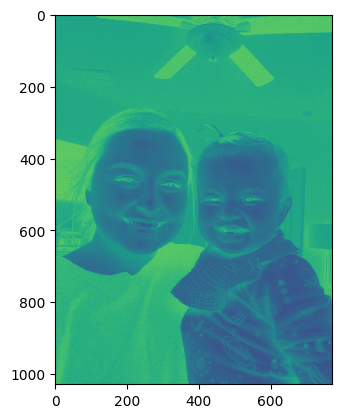

In [11]:
model = Sequential()
model.add(Convolution2D(
    1, # number of filter layers
    3, # y dimension of kernel (we're going for a 3x3 kernel)
    3, # x dimention of kernel
    input_shape=fam.shape
))

# keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_fam_printer(model, fam)

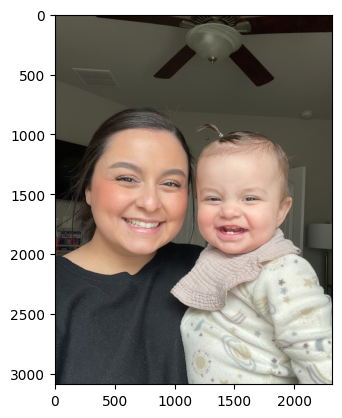

In [12]:
plt.imshow(fam)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
(1029, 772, 1)
(1029, 772)


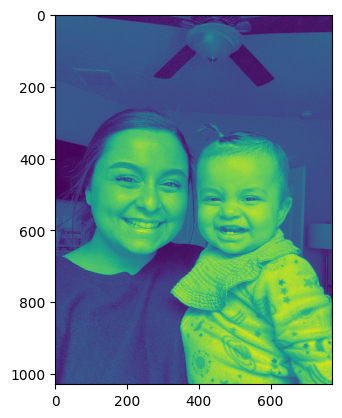

In [13]:
model = Sequential()
model.add(Convolution2D(
    1, # number of filter layers
    3, # y dimension of kernel (we're going for a 3x3 kernel)
    3, # x dimention of kernel
    input_shape=fam.shape
))

# adding a new activation layer
model.add(Activation('relu'))

# keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_fam_printer(model, fam)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
(205, 154, 1)
(205, 154)


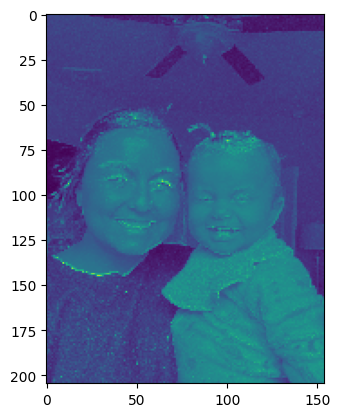

In [15]:
model = Sequential()
model.add(Convolution2D(
    1, # number of filter layers
    3, # y dimension of kernel (we're going for a 3x3 kernel)
    3, # x dimention of kernel
    input_shape=fam.shape
))

# adding a pooling layer
model.add(MaxPooling2D(pool_size=(5, 5)))

# keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_fam_printer(model, fam)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
(205, 154, 1)
(205, 154)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


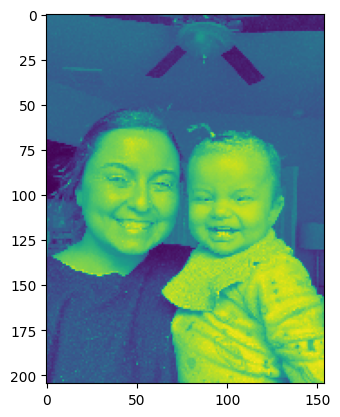

In [16]:
model = Sequential()
model.add(Convolution2D(
    1, # number of filter layers
    3, # y dimension of kernel (we're going for a 3x3 kernel)
    3, # x dimention of kernel
    input_shape=fam.shape
))

# adding a new activation layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))

# keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_fam_printer(model, fam)